In [892]:
# Importo el dataset y las librerias.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/goles_europa_eeuu.csv')
df.head()

,Season,Competition,Date,Venue,Club,Opponent,Minute,At_score,Type,Goal_assist,Comunidad,Score home,Score visitant
0,04/05,LaLiga,01-05-2005,H,FC Barcelona,Albacete Balompie,90+1,2-00,Left-footed shot,Ronaldinho Gaacho,Castilla La Mancha,2,0
1,05/06,UEFA Champions League,02-11-2005,H,FC Barcelona,Panathinaikos Athens,34,3-00,Left-footed shot,NaN,Atenas,5,0
2,10/11,UEFA Champions League,14-09-2010,H,FC Barcelona,Panathinaikos Athens,22,1-01,Left-footed shot,Xavi,Atenas,5,1
3,10/11,UEFA Champions League,14-09-2010,H,FC Barcelona,Panathinaikos Athens,45,3-01,Left-footed shot,Pedro,Atenas,5,1
4,10/11,UEFA Champions League,24-11-2010,A,FC Barcelona,Panathinaikos Athens,63,0-02,Left-footed shot,Adriano,Atenas,0,3


In [893]:
# Hay 2 temporadas que aparecen como fecha

df['Season'].unique()

array(['04/05', '05/06', '10/11', '08/09', '09/10', '11-Dec', 'Dec-13',
       '13/14', '14/15', '15/16', '16/17', '17/18', '20/21', '18/19',
       '19/20', '07/08', '06/07', '22/23', '21/22'], dtype=object)

In [894]:
# Las reemplazo.

df['Season'] = df['Season'].replace({'11-Dec': '11/12', 'Dec-13': '12/13'})

In [895]:
# Goles por temporada

goles_by_season = df.groupby(df['Season']).size()
goles_by_season

Season
04/05     1
05/06     8
06/07    17
07/08    16
08/09    38
09/10    47
10/11    53
11/12    73
12/13    60
13/14    41
14/15    58
15/16    41
16/17    54
17/18    45
18/19    51
19/20    31
20/21    38
21/22    12
22/23    30
dtype: int64

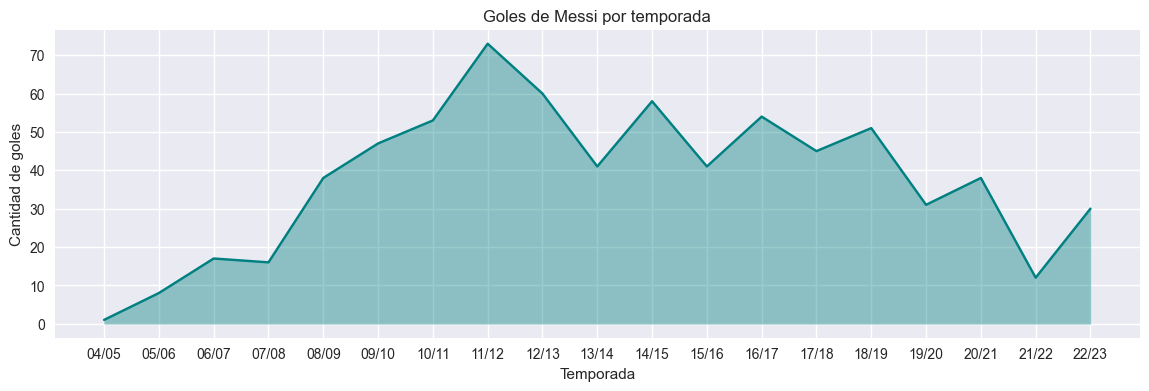

In [896]:
# Crear el gráfico

fig = plt.figure(figsize=(14,4))
plt.plot(goles_by_season.index, goles_by_season.values, color='teal')
plt.fill_between(goles_by_season.index, goles_by_season.values, color='teal', alpha=0.4)
plt.title("Goles de Messi por temporada")
plt.xlabel("Temporada")
plt.ylabel("Cantidad de goles")
plt.xticks(goles_by_season.index);


In [897]:
fig.savefig('graficos/golesxtemporada.png')

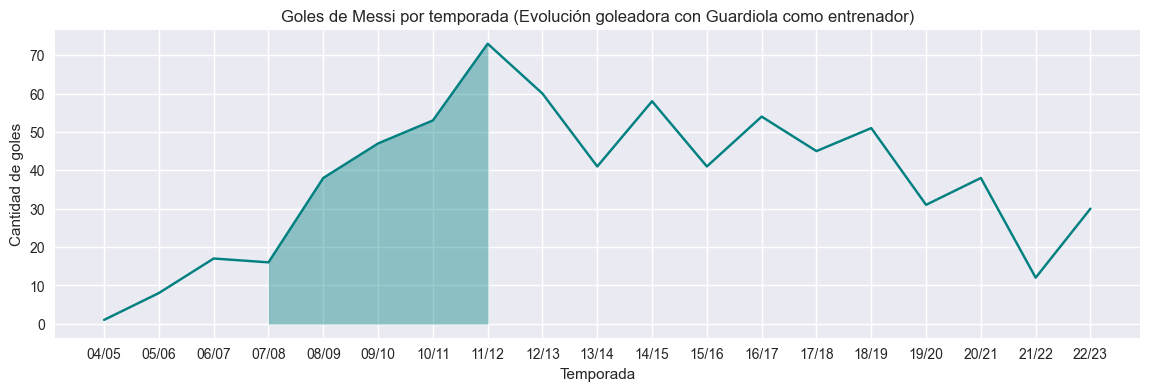

In [898]:
# Ahora destacando el crecimiento bajo las órdenes de Guardiola

fig = plt.figure(figsize=(14,4))
plt.plot(goles_by_season.index, goles_by_season.values, color='teal')
plt.fill_between(goles_by_season.index, goles_by_season.values, where=goles_by_season.index.isin(['07/08', '08/09', '09/10', '10/11', '11/12']), color='teal', alpha=0.4)
plt.title("Goles de Messi por temporada (Evolución goleadora con Guardiola como entrenador)")
plt.xlabel("Temporada")
plt.ylabel("Cantidad de goles")
plt.xticks(goles_by_season.index);

In [899]:
fig.savefig('graficos/golesconguardiola.png')

In [900]:
# df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
# df['Year'] = df['Date'].dt.year
# df.head()

In [901]:
# Intente sombrear por cada equipo, pero no lo consegui

# goles_by_years_by_teams = df.groupby('Year')['Club'].value_counts()
# goles_by_years_by_teams = pd.DataFrame(goles_by_years_by_teams)
# goles_by_years_by_teams


In [902]:
# Sumatoria de goles en el tiempo

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date')
df

,Season,Competition,Date,Venue,Club,Opponent,Minute,At_score,Type,Goal_assist,Comunidad,Score home,Score visitant
0,04/05,LaLiga,2005-05-01,H,FC Barcelona,Albacete Balompie,90+1,2-00,Left-footed shot,Ronaldinho Gaacho,Castilla La Mancha,2,0
1,05/06,UEFA Champions League,2005-11-02,H,FC Barcelona,Panathinaikos Athens,34,3-00,Left-footed shot,NaN,Atenas,5,0
5,05/06,LaLiga,2005-11-27,H,FC Barcelona,Racing Santander,51,2-00,Left-footed shot,Samuel Etoo,Cantabria,4,1
17,05/06,LaLiga,2006-01-15,H,FC Barcelona,Athletic Bilbao,50,2-01,Left-footed shot,Mark van Bommel,País Vasco,2,1
46,05/06,LaLiga,2006-01-22,H,FC Barcelona,Deportivo Alaves,82,2-00,Left-footed shot,Ronaldinho Gaacho,País Vasco,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,22/23,Leagues Cup,2023-08-06,A,Inter Miami,FC Dallas,6,0-1,Left-footed shot,Jordi Alba,Texas,0,1
706,22/23,Leagues Cup,2023-08-11,H,Inter Miami,Charlotte,86,4-0,Left-footed shot,Leonardo Campana,Carolina del Norte,4,0
705,22/23,Leagues Cup,2023-08-15,A,Inter Miami,Philadelphia Union,20,0-2,Left-footed shot,Josef Martínez,Pensilvania,0,2
704,22/23,Leagues Cup,2023-08-20,A,Inter Miami,Nashville SC,23,0-1,Left-footed shot,NaN,Tennessee,0,1


In [903]:
# Agrego la columna gol número.

df['Gol Numero'] = range(1, len(df) + 1)
df

,Season,Competition,Date,Venue,Club,Opponent,Minute,At_score,Type,Goal_assist,Comunidad,Score home,Score visitant,Gol Numero
0,04/05,LaLiga,2005-05-01,H,FC Barcelona,Albacete Balompie,90+1,2-00,Left-footed shot,Ronaldinho Gaacho,Castilla La Mancha,2,0,1
1,05/06,UEFA Champions League,2005-11-02,H,FC Barcelona,Panathinaikos Athens,34,3-00,Left-footed shot,NaN,Atenas,5,0,2
5,05/06,LaLiga,2005-11-27,H,FC Barcelona,Racing Santander,51,2-00,Left-footed shot,Samuel Etoo,Cantabria,4,1,3
17,05/06,LaLiga,2006-01-15,H,FC Barcelona,Athletic Bilbao,50,2-01,Left-footed shot,Mark van Bommel,País Vasco,2,1,4
46,05/06,LaLiga,2006-01-22,H,FC Barcelona,Deportivo Alaves,82,2-00,Left-footed shot,Ronaldinho Gaacho,País Vasco,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,22/23,Leagues Cup,2023-08-06,A,Inter Miami,FC Dallas,6,0-1,Left-footed shot,Jordi Alba,Texas,0,1,710
706,22/23,Leagues Cup,2023-08-11,H,Inter Miami,Charlotte,86,4-0,Left-footed shot,Leonardo Campana,Carolina del Norte,4,0,711
705,22/23,Leagues Cup,2023-08-15,A,Inter Miami,Philadelphia Union,20,0-2,Left-footed shot,Josef Martínez,Pensilvania,0,2,712
704,22/23,Leagues Cup,2023-08-20,A,Inter Miami,Nashville SC,23,0-1,Left-footed shot,NaN,Tennessee,0,1,713


In [904]:
df['Año'] = df['Date'].dt.year
df['Año'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [905]:
df['Mes'] = df['Date'].dt.month
df['Mes'].unique()

array([ 5, 11,  1,  2,  8,  9, 10,  3,  4,  6, 12,  7])

Text(0, 0.5, 'Número de Gol')

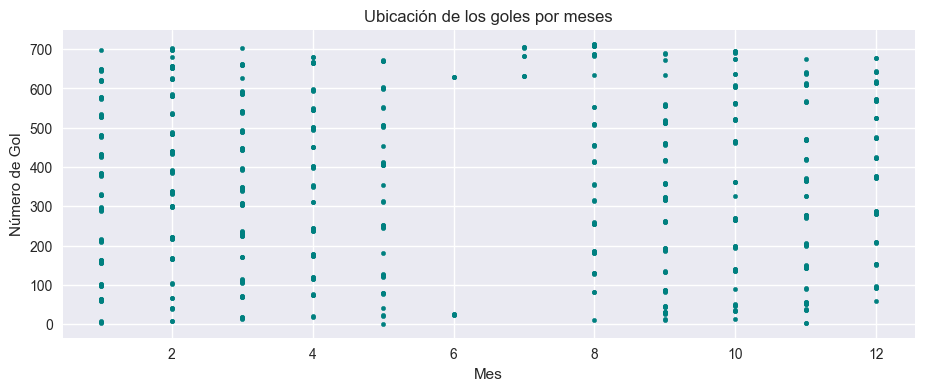

In [906]:
# Distribución de goles por meses.

fig = plt.figure(figsize=(11, 4))
plt.scatter(df['Mes'], df['Gol Numero'], c='teal', marker='o', s=10)

plt.title("Ubicación de los goles por meses")
plt.xlabel("Mes")
plt.ylabel("Número de Gol")

In [907]:
fig.savefig('graficos/golesxmeses.png')

In [908]:
df['Mes'].value_counts().sort_index(ascending=True)

Mes
1     94
2     83
3     92
4     70
5     53
6      7
7      8
8     48
9     73
10    61
11    70
12    55
Name: count, dtype: int64

In [909]:
datos = {'Mes': list(df['Mes'].value_counts().sort_index(ascending=True).index),
         'Goles': list(df['Mes'].value_counts().sort_index(ascending=True).values)}
datos = pd.DataFrame(datos)
datos

,Mes,Goles
0,1,94
1,2,83
2,3,92
3,4,70
4,5,53
5,6,7
6,7,8
7,8,48
8,9,73
9,10,61


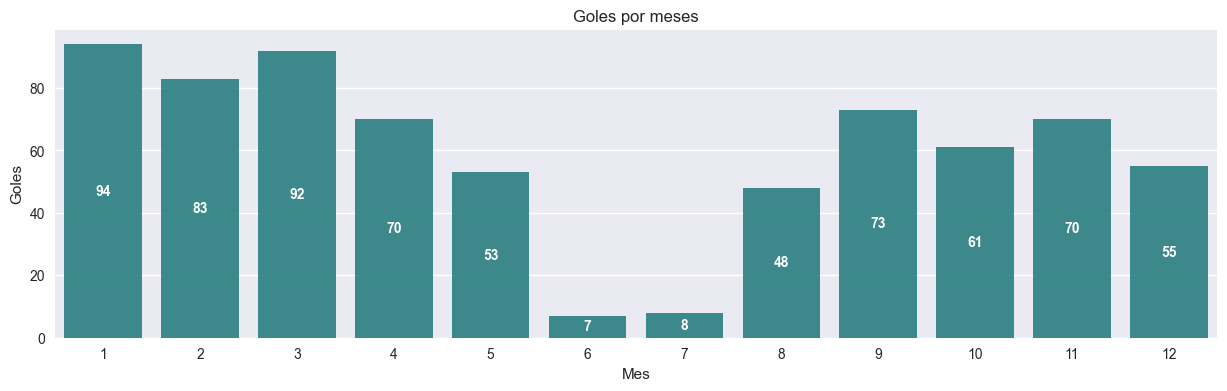

In [910]:
# El mes del año donde Messi hizo más goles es Enero

plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(15, 4))
ax = sns.barplot(data=datos, x='Mes', y='Goles', color='teal', alpha=0.8)
plt.title("Goles por meses")
plt.xlabel("Mes")
plt.ylabel("Goles")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10, color='white', fontweight='bold');

In [911]:
fig.savefig('graficos/golesxmeses_barras.png')

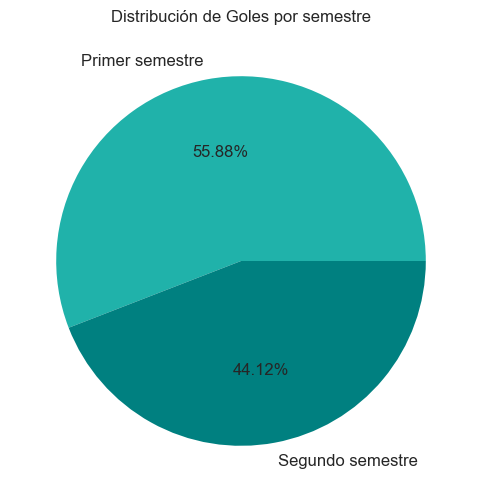

In [912]:
# Por semestre

fig = plt.figure(figsize=(8, 6))
primer_semestre = datos[datos['Mes'].between(1, 6)]['Goles'].sum()
segundo_semestre = datos[datos['Mes'].between(7, 12)]['Goles'].sum()
plt.pie([primer_semestre, segundo_semestre],
         labels=['Primer semestre', 'Segundo semestre'],
           colors=['lightseagreen', 'teal'], textprops={'fontsize': 12}, autopct='%1.2f%%')
plt.title("Distribución de Goles por semestre");

In [913]:
fig.savefig('graficos/golesxsemestres.png')

In [914]:
# Veo como aparecen escritos los clubes

df['Club'].unique()

array(['FC Barcelona', 'Paris Saint-Germain', 'Inter Miami'], dtype=object)

In [915]:
# Hay competiciones que aparecen escritas de diferentes maneras pero son las mismas
df['Competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions', 'Troph�e des Champions',
       'Champions League', 'Leagues Cup', 'Mayor League Soccer'],
      dtype=object)

In [916]:
# Hago las modificaciones

df['Competition'] = df['Competition'].replace({"Troph�e des Champions" : "Trophée des Champions", "Champions League": "UEFA Champions League"})
df['Competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions', 'Leagues Cup', 'Mayor League Soccer'],
      dtype=object)

C:\Users\matia\AppData\Local\Temp\ipykernel_41588\1441416427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_bcn, height=4, aspect=3, palette='Paired', legend=False)
c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


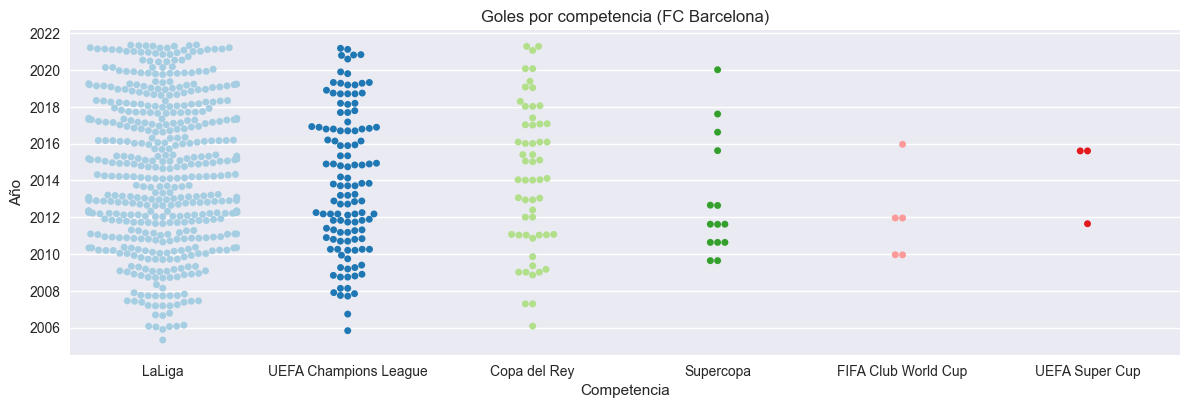

In [917]:
# Goles por competencia en Barcelona.

df_bcn = df[df['Club']=='FC Barcelona']
fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_bcn, height=4, aspect=3, palette='Paired', legend=False)
plt.xlabel('Competencia')
plt.ylabel('Año')
plt.title('Goles por competencia (FC Barcelona)');

In [918]:
fig.savefig('graficos/golesxtorneo_bcn.png')

In [919]:
promedio_por_torneo = df.groupby('Club')['Competition'].value_counts()
promedio_por_torneo = pd.DataFrame(promedio_por_torneo)
promedio_por_torneo['Partidos'] = [520, 149, 80, 20, 5, 4, 7, 6, 58, 14, 1]  # Datos recogidos de internet.
promedio_por_torneo['Promedio'] = round((promedio_por_torneo['count'] / promedio_por_torneo['Partidos']), 2)

In [920]:
promedio_por_torneo

count  Partidos  Promedio
Club                Competition                                     
FC Barcelona        LaLiga                   474       520      0.91
                    UEFA Champions League    120       149      0.81
                    Copa del Rey              56        80      0.70
                    Supercopa                 14        20      0.70
                    FIFA Club World Cup        5         5      1.00
                    UEFA Super Cup             3         4      0.75
Inter Miami         Leagues Cup               10         7      1.43
                    Mayor League Soccer        1         6      0.17
Paris Saint-Germain Ligue 1                   20        58      0.34
                    UEFA Champions League      9        14      0.64
                    Trophée des Champions      2         1      2.00

In [921]:
promedio_por_torneo.iloc[:6, :]

count  Partidos  Promedio
Club         Competition                                     
FC Barcelona LaLiga                   474       520      0.91
             UEFA Champions League    120       149      0.81
             Copa del Rey              56        80      0.70
             Supercopa                 14        20      0.70
             FIFA Club World Cup        5         5      1.00
             UEFA Super Cup             3         4      0.75

C:\Users\matia\AppData\Local\Temp\ipykernel_41588\3704007519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[:6, :], palette="Paired", estimator="sum", errorbar=None)


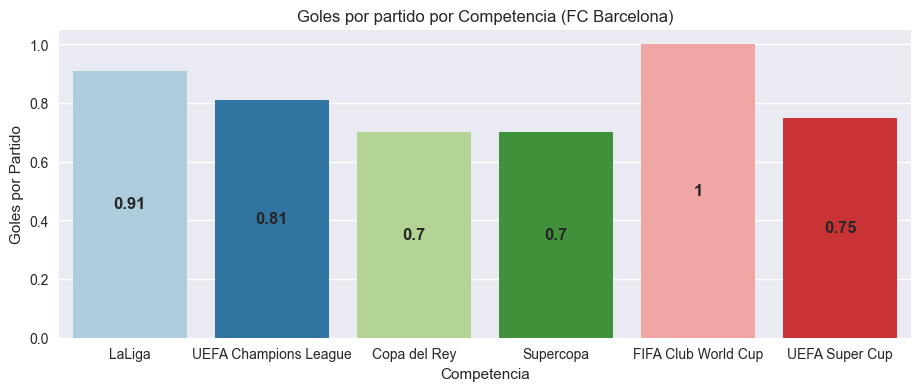

In [922]:
fig = plt.figure(figsize=(11, 4))
ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[:6, :], palette="Paired", estimator="sum", errorbar=None)
plt.title("Goles por partido por Competencia (FC Barcelona)")
plt.xlabel("Competencia")
plt.ylabel("Goles por Partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=12, fontweight='bold' );

In [923]:
fig.savefig('graficos/golesxpartido_xtorneo_bcn.png')

C:\Users\matia\AppData\Local\Temp\ipykernel_41588\1120785857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_psg, height=3, aspect=2.5, palette='Paired', legend=False)


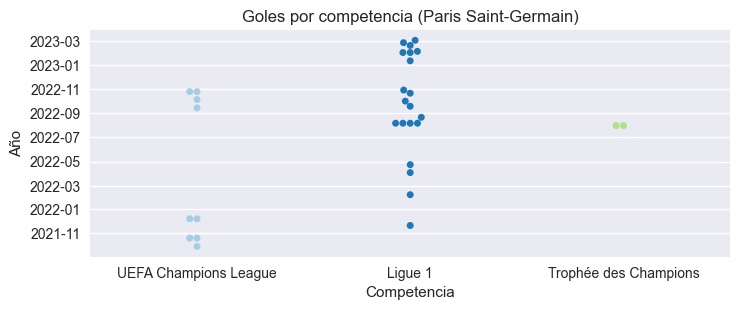

In [924]:
# Goles por competencia en Paris Saint-Germain.

df_psg = df[df['Club']=='Paris Saint-Germain']
fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_psg, height=3, aspect=2.5, palette='Paired', legend=False)
plt.xlabel('Competencia')
plt.ylabel('Año')
plt.title('Goles por competencia (Paris Saint-Germain)');

In [925]:
fig.savefig('graficos/golesxtorneo_psg.png')

C:\Users\matia\AppData\Local\Temp\ipykernel_41588\29442651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[8:, :], palette="Paired", estimator="sum", errorbar=None)


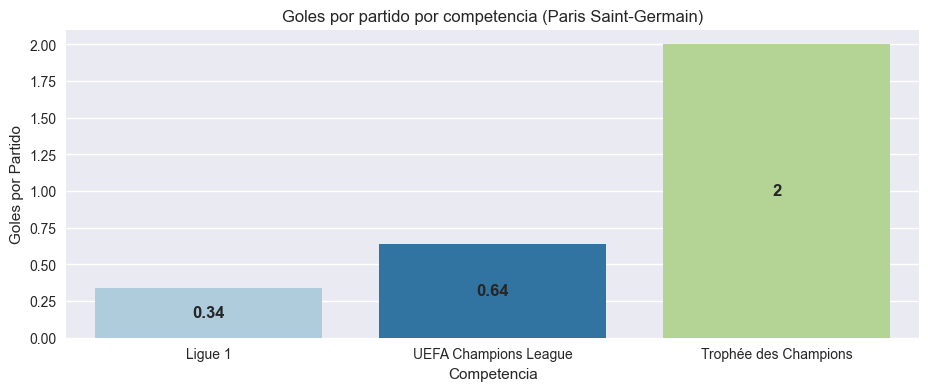

In [926]:
fig = plt.figure(figsize=(11, 4))
ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[8:, :], palette="Paired", estimator="sum", errorbar=None)
plt.title("Goles por partido por competencia (Paris Saint-Germain)")
plt.xlabel("Competencia")
plt.ylabel("Goles por Partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=12, fontweight='bold' );

In [927]:
fig.savefig('graficos/golesxpartido_xtorneo_psg.png')

C:\Users\matia\AppData\Local\Temp\ipykernel_41588\2880984506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_inter, height=3, aspect=2.5, palette='Paired', legend=False)


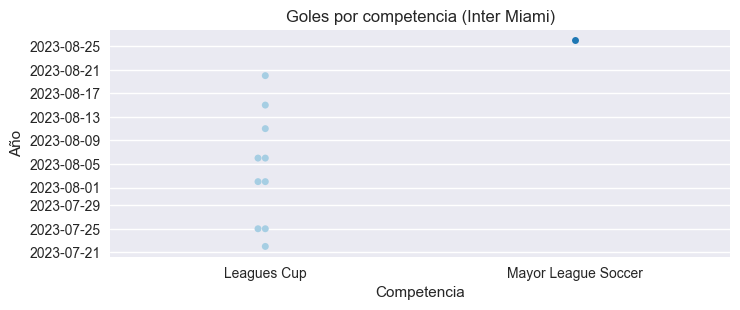

In [928]:
# Goles por competencia en Inter Miami.

df_inter = df[df['Club']=='Inter Miami']
fig = sns.catplot(x="Competition", y="Date", kind="swarm", data=df_inter, height=3, aspect=2.5, palette='Paired', legend=False)
plt.xlabel('Competencia')
plt.ylabel('Año')
plt.title('Goles por competencia (Inter Miami)');

In [929]:
fig.savefig('graficos/golesxtorneo_inter.png')

C:\Users\matia\AppData\Local\Temp\ipykernel_41588\4231368371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[6:8, :], palette="Paired", estimator="sum", errorbar=None)


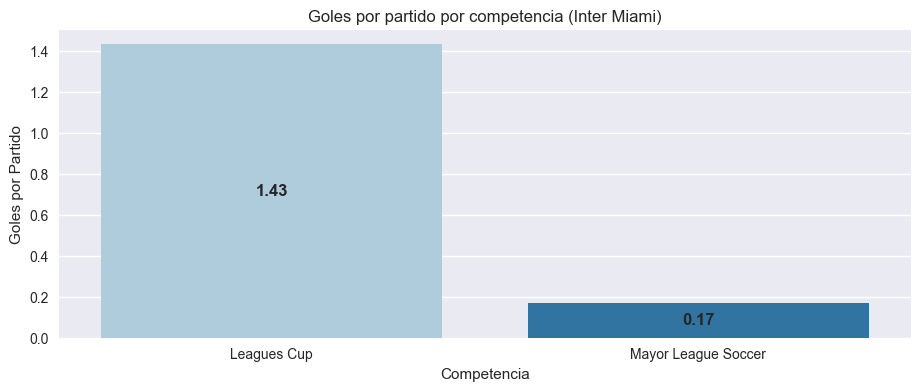

In [930]:
fig = plt.figure(figsize=(11, 4))
ax = sns.barplot(x="Competition", y="Promedio", data=promedio_por_torneo.iloc[6:8, :], palette="Paired", estimator="sum", errorbar=None)
plt.title("Goles por partido por competencia (Inter Miami)")
plt.xlabel("Competencia")
plt.ylabel("Goles por Partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=12, fontweight='bold' );

In [931]:
fig.savefig('graficos/golesxpartido_xtorneo_inter.png')

C:\Users\matia\AppData\Local\Temp\ipykernel_41588\1979396443.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Date', hue='Venue', shade=True)


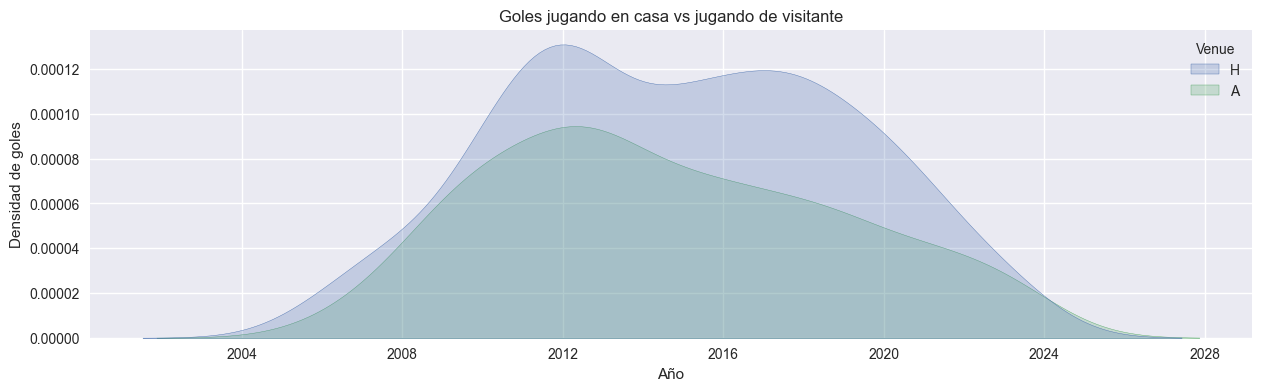

In [932]:
#Densidad de goles marcados en casa vs de visitante.

fig = plt.figure(figsize=(15,4))
sns.kdeplot(data=df, x='Date', hue='Venue', shade=True)
plt.title("Goles jugando en casa vs jugando de visitante")
plt.xlabel("Año")
plt.ylabel("Densidad de goles");

In [933]:
fig.savefig('graficos/goles_local_visitante.png')

C:\Users\matia\AppData\Local\Temp\ipykernel_41588\2591156052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.catplot(x="Venue",


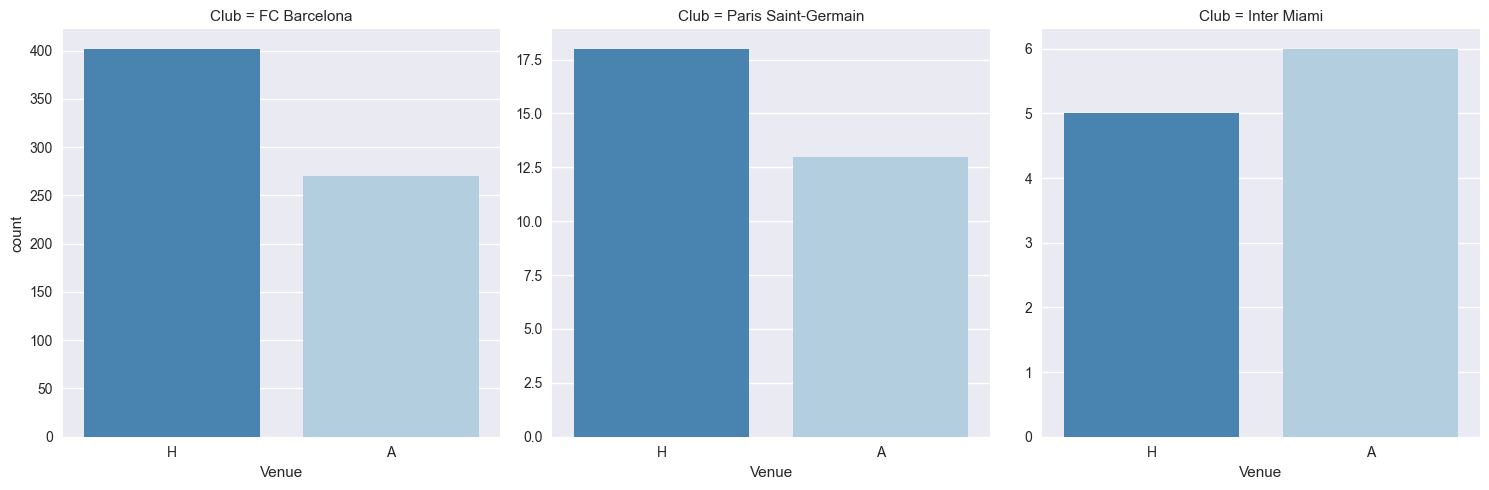

In [934]:
# Aquí lo vemos en cantidades y por club.
fig = sns.catplot(x="Venue",
            col="Club",
            col_wrap=3,
            data=df,
            kind="count",
            sharey=False,
            palette='Blues_r',
            legend=False);

In [935]:
fig.savefig('graficos/goles_local_visitante_porclub.png')

In [936]:
# Máximos asistidores de Messi en su carrera a nivel clubes.

max_asistidores = df['Goal_assist'].value_counts().head(10)
max_asistidores = pd.DataFrame(max_asistidores)
max_asistidores.head()


,count
Goal_assist,
Luis Suarez,48
Dani Alves,42
Andres Iniesta,39
Xavi,34
Neymar,30


C:\Users\matia\AppData\Local\Temp\ipykernel_41588\1994969239.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=max_asistidores.index, y=max_asistidores['count'], data=max_asistidores, palette='mako', errorbar=None)


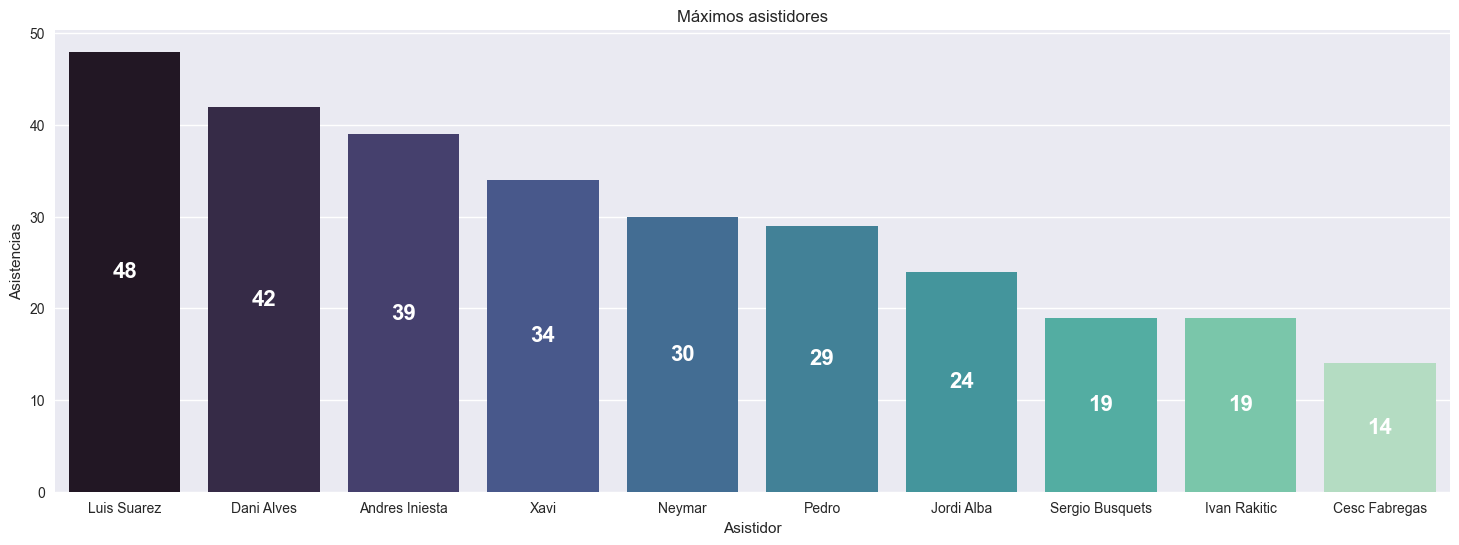

In [939]:
# En un gráfico de barras

fig = plt.figure(figsize=(18,6))
ax = sns.barplot(x=max_asistidores.index, y=max_asistidores['count'], data=max_asistidores, palette='mako', errorbar=None)
plt.title("Máximos asistidores")
plt.xlabel("Asistidor")
plt.ylabel("Asistencias")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=16, color='white', fontweight='bold');

In [938]:
fig.savefig('graficos/maximos_asistidores.png')